# Exploratory Data Analysis

Breve Explicação sobre notebook

## Summary??

## 1. Import Libraries and Utilities

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import numpy as np
import seaborn as sns
import plotly.express as px # map
from pandas.plotting import scatter_matrix # scatter matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import utilities
from utils import *

## 2. Import Dataset

In [3]:
# Import dataset
cust_info = data_load('.\\Data\\Customer Info Dataset.csv')

In [4]:
# See dataset
cust_info.head()

customer_id          customer_name customer_gender   customer_birthdate  \
0         4239         Sara Moscowitz          female  09/10/1999 03:11 PM   
1        19330       Donald Robertson            male  06/26/1981 10:58 PM   
2         2272  Phd. Felicia Bradshaw          female  01/31/1987 09:08 AM   
3        25288          Emma Williams          female  06/17/1942 12:02 AM   
4        12829           Hilda Huerta          female  01/31/2000 11:43 AM   

   kids_home  teens_home  number_complaints  distinct_stores_visited  \
0        0.0         0.0                0.0                      2.0   
1        1.0         0.0                0.0                      2.0   
2        1.0         1.0                0.0                     20.0   
3        3.0         4.0                1.0                      2.0   
4        0.0         0.0                0.0                      2.0   

   lifetime_spend_groceries  lifetime_spend_electronics  ...  \
0                      91.0                        20.0  ...   
1                     197.0                      5958.0  ...   
2                     397.0                        20.0  ...   
3                    5282.0                       237.0  ...   
4                      82.0                        22.0  ...   

   lifetime_spend_meat  lifetime_spend_fish  lifetime_spend_hygiene  \
0                 53.0                 48.0                    47.0   
1                 86.0                 80.0                    45.0   
2                204.0                170.0                    46.0   
3               1081.0               1068.0                   617.0   
4                 39.0                 39.0                    48.0   

   lifetime_spend_videogames  lifetime_total_distinct_products  \
0                      105.0                              85.0   
1                     1964.0                              85.0   
2                        5.0                             408.0   
3                     1078.0                            1956.0   
4                      103.0                              83.0   

   percentage_of_products_bought_promotion  year_first_transaction  \
0                                 0.192154                  2017.0   
1                                 0.098647                  2015.0   
2                                 0.497251                  2008.0   
3                                 0.206713                  2010.0   
4                                 0.200625                  2015.0   

   loyalty_card_number   latitude  longitude  
0                  NaN  38.754263  -9.163397  
1                  NaN  38.777761  -9.156197  
2                  NaN  38.785329  -9.127113  
3                  NaN  38.744086  -9.156589  
4                  NaN  38.756024  -9.162970  

[5 rows x 24 columns]

## 3. Check duplicates 

In [5]:
# Search for duplicated 'customer_id'
cust_info['customer_id'].duplicated().sum()

0

Não sei o que escrever

In [6]:
# Set 'customer_id' as index
cust_info = cust_info.set_index('customer_id')

## 4. Check Data Types 

In [7]:
cust_info.dtypes

customer_name                               object
customer_gender                             object
customer_birthdate                          object
kids_home                                  float64
teens_home                                 float64
number_complaints                          float64
distinct_stores_visited                    float64
lifetime_spend_groceries                   float64
lifetime_spend_electronics                 float64
typical_hour                               float64
lifetime_spend_vegetables                  float64
lifetime_spend_nonalcohol_drinks           float64
lifetime_spend_alcohol_drinks              float64
lifetime_spend_meat                        float64
lifetime_spend_fish                        float64
lifetime_spend_hygiene                     float64
lifetime_spend_videogames                  float64
lifetime_total_distinct_products           float64
percentage_of_products_bought_promotion    float64
year_first_transaction         

### 4.1 Necessary changes to datatypes

Transform dates into pandas datetime object.

In [8]:
convert_to_dt(cust_info, 'customer_birthdate')
cust_info['year_first_transaction'] = pd.to_datetime(cust_info['year_first_transaction'], format='%Y').dt.year

Transform float variables into integers.

In [9]:
cust_info = float_to_int(cust_info, ['kids_home',
                                     'teens_home',
                                     'number_complaints',
                                     'distinct_stores_visited',
                                     'year_first_transaction',
                                     'loyalty_card_number'])

In [10]:
cust_info

customer_name customer_gender  customer_birthdate  \
customer_id                                                              
4239                Sara Moscowitz          female 1999-09-10 15:11:00   
19330             Donald Robertson            male 1981-06-26 22:58:00   
2272         Phd. Felicia Bradshaw          female 1987-01-31 09:08:00   
25288                Emma Williams          female 1942-06-17 00:02:00   
12829                 Hilda Huerta          female 2000-01-31 11:43:00   
...                            ...             ...                 ...   
625               Phd. Karen Watts          female 1974-11-01 05:26:00   
26447              Curtis Thompson            male 1986-02-21 11:27:00   
182                 Richard Carter            male 2001-01-14 05:49:00   
13768                  Jerry Yoder            male 1958-08-21 12:12:00   
2570             Phd. James Cooper            male 1944-01-16 09:35:00   

             kids_home  teens_home  number_complaints  \
customer_id                                             
4239                 0           0                  0   
19330                1           0                  0   
2272                 1           1                  0   
25288                3           4                  1   
12829                0           0                  0   
...                ...         ...                ...   
625                  0           0                  1   
26447                0           0                  0   
182                  0           0                  0   
13768                1           0                  1   
2570                 1           1                  0   

             distinct_stores_visited  lifetime_spend_groceries  \
customer_id                                                      
4239                               2                      91.0   
19330                              2                     197.0   
2272                              20                     397.0   
25288                              2                    5282.0   
12829                              2                      82.0   
...                              ...                       ...   
625                                2                     209.0   
26447                              3                     185.0   
182                                2                      83.0   
13768                             20                     391.0   
2570                               2                     834.0   

             lifetime_spend_electronics  typical_hour  ...  \
customer_id                                            ...   
4239                               20.0          22.0  ...   
19330                            5958.0          21.0  ...   
2272                               20.0           9.0  ...   
25288                             237.0          12.0  ...   
12829                              22.0          21.0  ...   
...                                 ...           ...  ...   
625                              5474.0          20.0  ...   
26447                            1066.0          15.0  ...   
182                                23.0          23.0  ...   
13768                              20.0          10.0  ...   
2570                              596.0          18.0  ...   

             lifetime_spend_meat  lifetime_spend_fish  lifetime_spend_hygiene  \
customer_id                                                                     
4239                        53.0                 48.0                    47.0   
19330                       86.0                 80.0                    45.0   
2272                       204.0                170.0                    46.0   
25288                     1081.0               1068.0                   617.0   
12829                       39.0                 39.0                    48.0   
...                          ...                  ...                     ...   
62

### 4.2. Separate categorical and numerical variables

In [11]:
cat_cust_info, num_cust_info = categorical_numerical(
    cust_info,
    ['customer_name'],
    ['customer_birthdate',
     'loyalty_card_number',
     'latitude', 'longitude'
    ]
)

In [12]:
# See categorical DataFrame
cat_cust_info

customer_gender
customer_id                
4239                 female
19330                  male
2272                 female
25288                female
12829                female
...                     ...
625                  female
26447                  male
182                    male
13768                  male
2570                   male

[30000 rows x 1 columns]

In [13]:
# See numerical DataFrame
num_cust_info

kids_home  teens_home  number_complaints  \
customer_id                                             
4239                 0           0                  0   
19330                1           0                  0   
2272                 1           1                  0   
25288                3           4                  1   
12829                0           0                  0   
...                ...         ...                ...   
625                  0           0                  1   
26447                0           0                  0   
182                  0           0                  0   
13768                1           0                  1   
2570                 1           1                  0   

             distinct_stores_visited  lifetime_spend_groceries  \
customer_id                                                      
4239                               2                      91.0   
19330                              2                     197.0   
2272                              20                     397.0   
25288                              2                    5282.0   
12829                              2                      82.0   
...                              ...                       ...   
625                                2                     209.0   
26447                              3                     185.0   
182                                2                      83.0   
13768                             20                     391.0   
2570                               2                     834.0   

             lifetime_spend_electronics  typical_hour  \
customer_id                                             
4239                               20.0          22.0   
19330                            5958.0          21.0   
2272                               20.0           9.0   
25288                             237.0          12.0   
12829                              22.0          21.0   
...                                 ...           ...   
625                              5474.0          20.0   
26447                            1066.0          15.0   
182                                23.0          23.0   
13768                              20.0          10.0   
2570                              596.0          18.0   

             lifetime_spend_vegetables  lifetime_spend_nonalcohol_drinks  \
customer_id                                                                
4239                              22.0                             195.0   
19330                             20.0                            1435.0   
2272                             310.0                             379.0   
25288                            499.0                             873.0   
12829                              9.0                             172.0   
...                                ...                               ...   
625                               18.0                            1435.0   
26447                            267.0                             276.0   
182                               23.0                             189.0   
13768                            295.0                             301.0   
2570                             339.0                             522.0   

             lifetime_spend_alcohol_drinks  lifetime_spend_meat  \
customer_id                                                       
4239                                 964.0                 53.0   
19330                                434.0                 86.0   
2272                                 222.0                204.0   
25288                                460.0               1081.0   
12829                                856.0                 39.0   
...                                    ...                  ...   
625                                  521.0                 21.0   
26447                                287.0                 47.0   
182        

## 5. Missing Values 

In [14]:
# Search for missing data
cust_info.isna().sum()

customer_name                                  0
customer_gender                                0
customer_birthdate                             0
kids_home                                      0
teens_home                                     0
number_complaints                              0
distinct_stores_visited                        0
lifetime_spend_groceries                       0
lifetime_spend_electronics                     0
typical_hour                                   0
lifetime_spend_vegetables                      0
lifetime_spend_nonalcohol_drinks               0
lifetime_spend_alcohol_drinks                  0
lifetime_spend_meat                            0
lifetime_spend_fish                            0
lifetime_spend_hygiene                         0
lifetime_spend_videogames                      0
lifetime_total_distinct_products               0
percentage_of_products_bought_promotion        0
year_first_transaction                         0
loyalty_card_number 

## 6. Summary Statistics 

In [15]:
# Get to know the dataset
cust_info.describe().T

count          mean           std  \
kids_home                                30000.0  1.146700e+00      1.234111   
teens_home                               30000.0  5.129333e-01      0.912502   
number_complaints                        30000.0  7.643667e-01      0.836341   
distinct_stores_visited                  30000.0  6.120767e+00      6.511410   
lifetime_spend_groceries                 30000.0  3.978634e+03   5280.641466   
lifetime_spend_electronics               30000.0  9.652388e+02   1755.323397   
typical_hour                             30000.0          -inf           NaN   
lifetime_spend_vegetables                30000.0  5.642078e+02    481.819086   
lifetime_spend_nonalcohol_drinks         30000.0  6.287501e+02    496.346400   
lifetime_spend_alcohol_drinks            30000.0  3.793445e+02    236.206400   
lifetime_spend_meat                      30000.0  5.138784e+02    575.448347   
lifetime_spend_fish                      30000.0  7.771518e+02   3036.405862   
lifetime_spend_hygiene                   30000.0  1.628245e+02    168.547217   
lifetime_spend_videogames                30000.0          -inf           NaN   
lifetime_total_distinct_products         30000.0  1.123887e+03   1423.956421   
percentage_of_products_bought_promotion  30000.0  1.909811e-01      0.145402   
year_first_transaction                   30000.0  2.008684e+03      4.992296   
loyalty_card_number                       5825.0  9.499115e+05  28920.116430   
latitude                                 30000.0  3.874822e+01      0.024788   
longitude                                30000.0 -9.157740e+00      0.025749   

                                                  min            25%  \
kids_home                                0.000000e+00       0.000000   
teens_home                               0.000000e+00       0.000000   
number_complaints                        0.000000e+00       0.000000   
distinct_stores_visited                  0.000000e+00       2.000000   
lifetime_spend_groceries                 0.000000e+00     220.000000   
lifetime_spend_electronics               1.058527e+00      45.000000   
typical_hour                                     -inf       9.000000   
lifetime_spend_vegetables                1.000000e+00     247.000000   
lifetime_spend_nonalcohol_drinks         0.000000e+00     244.000000   
lifetime_spend_alcohol_drinks            0.000000e+00     193.000000   
lifetime_spend_meat                      0.000000e+00      46.000000   
lifetime_spend_fish                      0.000000e+00      48.000000   
lifetime_spend_hygiene                   0.000000e+00      50.000000   
lifetime_spend_videogames                        -inf      46.000000   
lifetime_total_distinct_products         0.000000e+00     116.000000   
percentage_of_products_bought_promotion  2.192022e-02       0.099313   
year_first_transaction                   1.989000e+03    2006.000000   
loyalty_card_number                      9.000390e+05  924547.000000   
latitude                                 3.865335e+01      38.731150   
longitude                               -9.215240e+00      -9.177770   

                                                   50%            75%  \
kids_home                                     1.000000       1.000000   
teens_home                                    0.000000       1.000000   
number_complaints                             1.000000       1.000000   
distinct_stores_visited                       3.000000       8.000000   
lifetime_spend_groceries                    950.000000    5253.000000   
lifetime_spend_electronics                  194.000000     721.000000   
typical_hour                                 14.000000      20.000000   
lifetime_spend_vegetables                   425.000000     785.000000   
lifetime_spend_nonalcohol_drinks            425.000000     949.000000   
lifetime_spend_alcohol_drinks               419.000000     537.000000   
lifetime_spend_meat                         16

## 7. Identify Anomalies

Check if year of birth is smaller than the year of the first transaction.

In [16]:
# Transform `year_first_transation` to datetime with day and month
cust_info['year_first_transaction'] = pd.to_datetime(
    '01-01-'+ cust_info['year_first_transaction'].astype(str)
    )

In [17]:
# See clients younger than 16 (legal age)
cust_info[cust_info['customer_birthdate'].dt.year >
          cust_info['year_first_transaction'].dt.year - 16]

customer_name customer_gender  customer_birthdate  \
customer_id                                                            
12829               Hilda Huerta          female 2000-01-31 11:43:00   
15901              Sabra Terrell          female 1988-02-17 09:22:00   
17585          George Degasperis            male 1995-01-26 10:32:00   
4828          Bsc. Michael Pence            male 1986-08-13 06:22:00   
14909                 Kathy King          female 1990-03-11 10:59:00   
...                          ...             ...                 ...   
9969          Phd. Kathy Commons          female 1991-08-14 06:19:00   
19399                 Lura Burke          female 1997-04-27 17:22:00   
13776        Msc. Alberta Priddy          female 1995-02-14 19:02:00   
29519            Sandy Robertson          female 1998-11-20 00:55:00   
182               Richard Carter            male 2001-01-14 05:49:00   

             kids_home  teens_home  number_complaints  \
customer_id                                             
12829                0           0                  0   
15901                1           0                  2   
17585                1           0                  1   
4828                 1           0                  1   
14909                1           0                  1   
...                ...         ...                ...   
9969                 2           0                  0   
19399                1           1                  1   
13776                0           0                  0   
29519                1           1                  2   
182                  0           0                  0   

             distinct_stores_visited  lifetime_spend_groceries  \
customer_id                                                      
12829                              2                      82.0   
15901                              8                   14784.0   
17585                              8                   16931.0   
4828                               8                   14748.0   
14909                              2                     118.0   
...                              ...                       ...   
9969                               2                     848.0   
19399                              1                     331.0   
13776                              4                    6595.0   
29519                             20                     385.0   
182                                2                      83.0   

             lifetime_spend_electronics  typical_hour  ...  \
customer_id                                            ...   
12829                              22.0          21.0  ...   
15901                             196.0          18.0  ...   
17585                             195.0          12.0  ...   
4828                              208.0           3.0  ...   
14909                             462.0           7.0  ...   
...                                 ...           ...  ...   
9969                               47.0           8.0  ...   
19399                              55.0          13.0  ...   
13776                            1079.0          18.0  ...   
29519                              20.0           7.0  ...   
182                                23.0          23.0  ...   

             lifetime_spend_meat  lifetime_spend_fish  lifetime_spend_hygiene  \
customer_id                                                                     
12829                       39.0                 39.0                    48.0   
15901                     1528.0               1603.0                   114.0   
17585                     1473.0               1474.0                   269.0   
4828                      1616.0               1419.0                   279.0   
14909                      122.0                215.0                    52.0   
...                          ...                  ...                     ...   
9969                      

In [18]:
# Replace the year of birth so that all have at least
# 16 years in the year of first transaction
cust_info['customer_birthdate'] = np.where(
    cust_info['customer_birthdate'].dt.year >
          cust_info['year_first_transaction'].dt.year - 16,
    cust_info['year_first_transaction'] - pd.offsets.DateOffset(years=16),
    cust_info['customer_birthdate'])

In [19]:
# Confirm that there ar no ilegal customers
sum(cust_info['customer_birthdate'].dt.year >
          cust_info['year_first_transaction'].dt.year - 16)

0

In [20]:
# Make `year_first_transaction` just a year
cust_info['year_first_transaction'] = cust_info['year_first_transaction'].dt.year.astype(int)

Check `typical_hours` infinite values

In [21]:
# See infinite values
inf_typ_h = cust_info[np.isinf(cust_info['typical_hour']) == True]
inf_typ_h

customer_name customer_gender  customer_birthdate  \
customer_id                                                              
8592         Charles`s Supermarket            male 1988-01-18 04:13:00   
101            Annie`s Supermarket          female 1947-11-23 10:33:00   

             kids_home  teens_home  number_complaints  \
customer_id                                             
8592                 0           0                  0   
101                  0           0                  0   

             distinct_stores_visited  lifetime_spend_groceries  \
customer_id                                                      
8592                               1                   2.64414   
101                                1                   2.65918   

             lifetime_spend_electronics  typical_hour  ...  \
customer_id                                            ...   
8592                           1.130447          -inf  ...   
101                            1.133150          -inf  ...   

             lifetime_spend_meat  lifetime_spend_fish  lifetime_spend_hygiene  \
customer_id                                                                     
8592                    2.615969              35005.0                1.540302   
101                     2.608573              34702.0                1.553652   

             lifetime_spend_videogames  lifetime_total_distinct_products  \
customer_id                                                                
8592                              -inf                           0.95716   
101                               -inf                           0.91589   

             percentage_of_products_bought_promotion  year_first_transaction  \
customer_id                                                                    
8592                                        0.196409                    2013   
101                                         0.194451                    2009   

             loyalty_card_number   latitude  longitude  
customer_id                                             
8592                        <NA>  38.866685  -9.111366  
101                       910065  38.866048  -9.111718  

[2 rows x 23 columns]

In [22]:
# Drop infinite values
cust_info = cust_info[~cust_info.isin(inf_typ_h).all(1)]
cust_info.shape

(29998, 23)

Transform `typical_hour` to datetime format.

In [23]:
cust_info['typical_hour'] = pd.to_datetime(cust_info['typical_hour'], format='%H').dt.hour
cust_info['typical_hour']

customer_id
4239     22
19330    21
2272      9
25288    12
12829    21
         ..
625      20
26447    15
182      23
13768    10
2570     18
Name: typical_hour, Length: 29998, dtype: int64

Check infinite values in `lifetime_spend_videogames`

In [24]:
# Check infinite values
cust_info[np.isinf(cust_info['lifetime_spend_videogames']) == True]

customer_name customer_gender  customer_birthdate  \
customer_id                                                              
1441          Fausto`s Supermarket            male 1989-01-23 11:26:00   
3399           Sandy`s Supermarket          female 1970-07-11 12:57:00   
8086          Eugene`s Supermarket            male 1956-02-29 20:26:00   
9706         Michele`s Supermarket          female 1962-12-06 02:12:00   
17805         Robert`s Supermarket            male 1982-09-22 03:36:00   
...                            ...             ...                 ...   
4689          Justin`s Supermarket            male 1959-03-20 15:59:00   
16270        Melissa`s Supermarket          female 1992-01-01 00:00:00   
10262        Francis`s Supermarket            male 1970-11-05 01:58:00   
25570          Tracy`s Supermarket          female 1976-06-11 14:22:00   
25779         Robert`s Supermarket            male 1965-01-07 03:32:00   

             kids_home  teens_home  number_complaints  \
customer_id                                             
1441                 0           0                  0   
3399                 0           0                  0   
8086                 0           0                  0   
9706                 0           0                  0   
17805                0           0                  0   
...                ...         ...                ...   
4689                 0           0                  0   
16270                0           0                  0   
10262                0           0                  0   
25570                0           0                  0   
25779                0           0                  0   

             distinct_stores_visited  lifetime_spend_groceries  \
customer_id                                                      
1441                               1                  2.678482   
3399                               1                  2.797932   
8086                               1                  2.802438   
9706                               1                  2.844843   
17805                              1                  2.751432   
...                              ...                       ...   
4689                               1                  2.741558   
16270                              1                  2.768803   
10262                              1                  2.788190   
25570                              1                  2.741804   
25779                              1                  2.650834   

             lifetime_spend_electronics  typical_hour  ...  \
customer_id                                            ...   
1441                           1.095507             0  ...   
3399                           1.141087             0  ...   
8086                           1.146242             0  ...   
9706                           1.184050             0  ...   
17805                          1.127715             0  ...   
...                                 ...           ...  ...   
4689                           1.113587             0  ...   
16270                          1.175120             0  ...   
10262                          1.130447             0  ...   
25570                          1.163490             0  ...   
25779                          1.133150             0  ...   

             lifetime_spend_meat  lifetime_spend_fish  lifetime_spend_hygiene  \
customer_id                                                                     
1441                    2.613335              34425.0                1.556140   
3399                    2.623429              36152.0                1.555148   
8086                    2.612483              34777.0                1.530623   
9706                    2.615854              35000.0                1.555148   
17805                   2.619223              35809.0                1.553152   
...                          ...                  ...                     ...   
46

In [25]:
# Impute infinite values with 0
cust_info['lifetime_spend_videogames'].replace([np.inf, -np.inf], 0, inplace=True)

In [26]:
# Check infinite values
cust_info[np.isinf(cust_info['lifetime_spend_videogames']) == True]

Empty DataFrame
Columns: [customer_name, customer_gender, customer_birthdate, kids_home, teens_home, number_complaints, distinct_stores_visited, lifetime_spend_groceries, lifetime_spend_electronics, typical_hour, lifetime_spend_vegetables, lifetime_spend_nonalcohol_drinks, lifetime_spend_alcohol_drinks, lifetime_spend_meat, lifetime_spend_fish, lifetime_spend_hygiene, lifetime_spend_videogames, lifetime_total_distinct_products, percentage_of_products_bought_promotion, year_first_transaction, loyalty_card_number, latitude, longitude]
Index: []

[0 rows x 23 columns]

## 8. Identify Outliers

In [27]:
IQR_outliers(cust_info, num_cust_info)

-------------------------------------
          Potential Outliers         
-------------------------------------
kids_home : Number of Outliers -> 1019
  Outliers:  [5 6 7 8 9 10]

teens_home : Number of Outliers -> 211
  Outliers:  [5 6 7 8 9]

number_complaints : Number of Outliers -> 135
  Outliers:  [5 6 7 8 9]

distinct_stores_visited : Number of Outliers -> 0

lifetime_spend_groceries : Number of Outliers -> 0

lifetime_spend_electronics : Number of Outliers -> 4610
  Outliers:  [3100. 3272. 3320. ... 6518. 6539. 6603.]

typical_hour : Number of Outliers -> 0

lifetime_spend_vegetables : Number of Outliers -> 0

lifetime_spend_nonalcohol_drinks : Number of Outliers -> 0

lifetime_spend_alcohol_drinks : Number of Outliers -> 0

lifetime_spend_meat : Number of Outliers -> 0

lifetime_spend_fish : Number of Outliers -> 224
  Outliers:  [33479. 33653. 33695. 33913. 33927. 33966. 33984. 33987. 34123. 34146.
 34157. 34163. 34168. 34169. 34218. 34219. 34224. 34293. 34310. 34317.
 34381

In [28]:
# Below identify outliers with histogram and scatterplots

## 9. Feature Engineering

Date of birth to age

In [29]:
# Calculate age of each customer
calc_age(cust_info)
cust_info['age']

customer_id
4239     23
19330    41
2272     36
25288    80
12829    24
         ..
625      48
26447    37
182      23
13768    64
2570     79
Name: age, Length: 29998, dtype: int32

Level of education in the variable name

In [30]:
# See pattern in names
cust_info['customer_name'].head(20)

customer_id
4239              Sara Moscowitz
19330           Donald Robertson
2272       Phd. Felicia Bradshaw
25288              Emma Williams
12829               Hilda Huerta
12267         Bsc. Anthony Brown
10548       Phd. Kimberly Milton
11199               Robert Smith
26762               Alan Lambert
457            Msc. Pamela Moser
15901              Sabra Terrell
8267           Denise Standridge
22941                 John Abreu
2803     Bsc. Kimberly Whitehead
20623             Cedrick Villar
2345          Bsc. Henry Schultz
19722                 Ann Murphy
17585          George Degasperis
1702           Phd. Robert Pires
15914             Fannie Onisick
Name: customer_name, dtype: object

In [31]:
# See level of education of each customer
# based on their name
cust_info['education'] = cust_info['customer_name'].apply(education)
cust_info['education']

customer_id
4239       HS
19330      HS
2272     Phd.
25288      HS
12829      HS
         ... 
625      Phd.
26447      HS
182        HS
13768      HS
2570     Phd.
Name: education, Length: 29998, dtype: object

Transform `customer_gender` into a binary variable

In [32]:
cust_info = cat_to_binary(cust_info, 'customer_gender', 'female')

Relation between customers and each loyalty card

In [33]:
cust_per_card, count_cards =  frequency_categorical(cust_info, 'loyalty_card_number')

Create a new variable for the total the customer has spent. 

In [34]:
cols_to_sum = cust_info.filter(regex='lifetime_spend').columns
cust_info['total_lifetime_spend'] = cust_info[cols_to_sum].sum(axis=1)

Create new a variable with the number of childreen.

In [35]:
cust_info['number_dependents'] = cust_info.kids_home + cust_info.teens_home
cust_info['number_dependents']

customer_id
4239     0
19330    1
2272     2
25288    7
12829    0
        ..
625      0
26447    0
182      0
13768    1
2570     2
Name: number_dependents, Length: 29998, dtype: Int64

In [36]:
cust_info

customer_name  customer_birthdate  kids_home  teens_home  \
customer_id                                                                     
4239                Sara Moscowitz 1999-09-10 15:11:00          0           0   
19330             Donald Robertson 1981-06-26 22:58:00          1           0   
2272         Phd. Felicia Bradshaw 1987-01-31 09:08:00          1           1   
25288                Emma Williams 1942-06-17 00:02:00          3           4   
12829                 Hilda Huerta 1999-01-01 00:00:00          0           0   
...                            ...                 ...        ...         ...   
625               Phd. Karen Watts 1974-11-01 05:26:00          0           0   
26447              Curtis Thompson 1986-02-21 11:27:00          0           0   
182                 Richard Carter 2000-01-01 00:00:00          0           0   
13768                  Jerry Yoder 1958-08-21 12:12:00          1           0   
2570             Phd. James Cooper 1944-01-16 09:35:00          1           1   

             number_complaints  distinct_stores_visited  \
customer_id                                               
4239                         0                        2   
19330                        0                        2   
2272                         0                       20   
25288                        1                        2   
12829                        0                        2   
...                        ...                      ...   
625                          1                        2   
26447                        0                        3   
182                          0                        2   
13768                        1                       20   
2570                         0                        2   

             lifetime_spend_groceries  lifetime_spend_electronics  \
customer_id                                                         
4239                             91.0                        20.0   
19330                           197.0                      5958.0   
2272                            397.0                        20.0   
25288                          5282.0                       237.0   
12829                            82.0                        22.0   
...                               ...                         ...   
625                             209.0                      5474.0   
26447                           185.0                      1066.0   
182                              83.0                        23.0   
13768                           391.0                        20.0   
2570                            834.0                       596.0   

             typical_hour  lifetime_spend_vegetables  ...  \
customer_id                                           ...   
4239                   22                       22.0  ...   
19330                  21                       20.0  ...   
2272                    9                      310.0  ...   
25288                  12                      499.0  ...   
12829                  21                        9.0  ...   
...                   ...                        ...  ...   
625                    20                       18.0  ...   
26447                  15                      267.0  ...   
182                    23                       23.0  ...   
13768                  10                      295.0  ...   
2570                   18                      339.0  ...   

             percentage_of_products_bought_promotion  year_first_transaction  \
customer_id                                                                    
4239                                        0.192154                    2017   
19330                                       0.098647                    2015   
2272                                        0.497251                    2008   
25288                                       0.206713                    2010   
12829                      

## 10. Visualize Data

In [37]:
# Change default of plot size
rcParams['figure.figsize'] = 15, 10

In [38]:
# Add new variables to the groups and confirm previous ones
cat_cust_info, num_cust_info = categorical_numerical(
    cust_info,
    ['customer_name'],
    ['customer_birthdate',
     'loyalty_card_number',
     'latitude', 'longitude'
    ]
)

### Numerical Data

##### Bar chart with number of customers per loyalty card

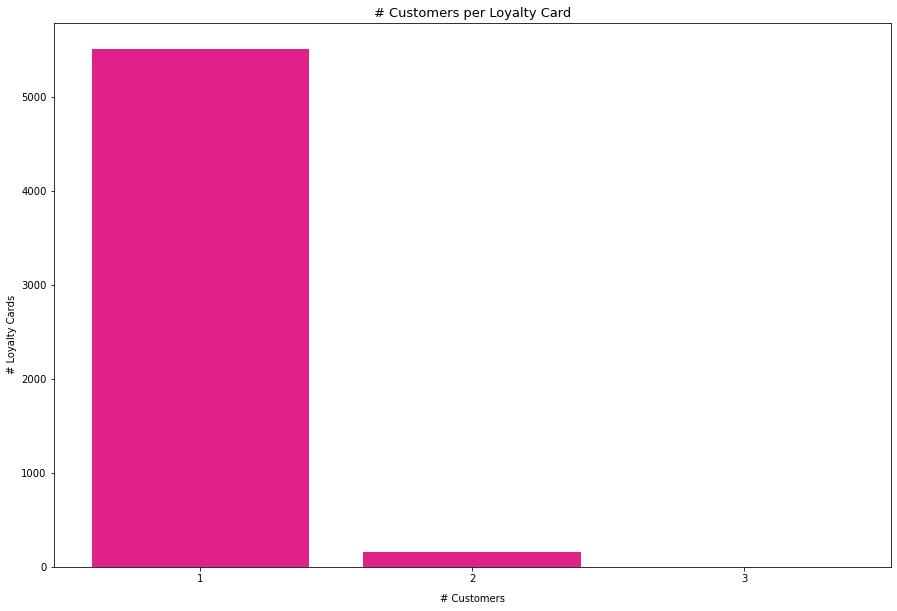

In [39]:
bar_chart(cust_per_card, count_cards,
          '# Customers', '# Loyalty Cards', 
          '# Customers per Loyalty Card')

Majority of cards are only used by one person.

##### Box plots of lifetime spent variables.

In [40]:
spend_groups = num_cust_info[['lifetime_spend_vegetables',
                        'lifetime_spend_nonalcohol_drinks','lifetime_spend_alcohol_drinks','lifetime_spend_meat',
                        'lifetime_spend_hygiene','lifetime_spend_videogames']]
fish_group = num_cust_info['lifetime_spend_fish']
groc_group = num_cust_info['lifetime_spend_groceries']
elec_group = num_cust_info['lifetime_spend_electronics']

{'whiskers': [<matplotlib.lines.Line2D at 0x1bc2a8bd460>,
 'caps': [<matplotlib.lines.Line2D at 0x1bc2a8bdac0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bc290ebfa0>],
 'medians': [<matplotlib.lines.Line2D at 0x1bc2a8c9220>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bc2a8c95b0>],
 'means': []}

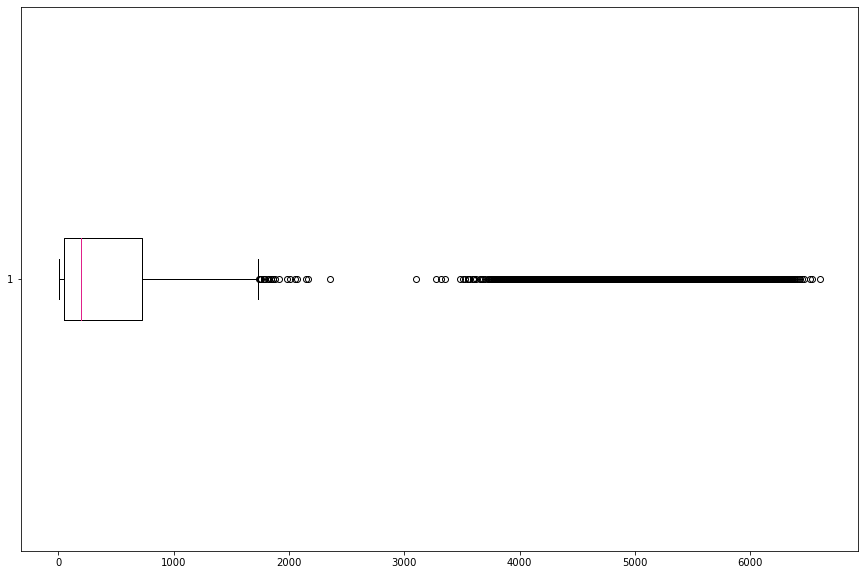

In [41]:
plt.boxplot(elec_group,medianprops = {'color':'#e0218a'},vert=False)

In [42]:
# Import utilities
from utils import *

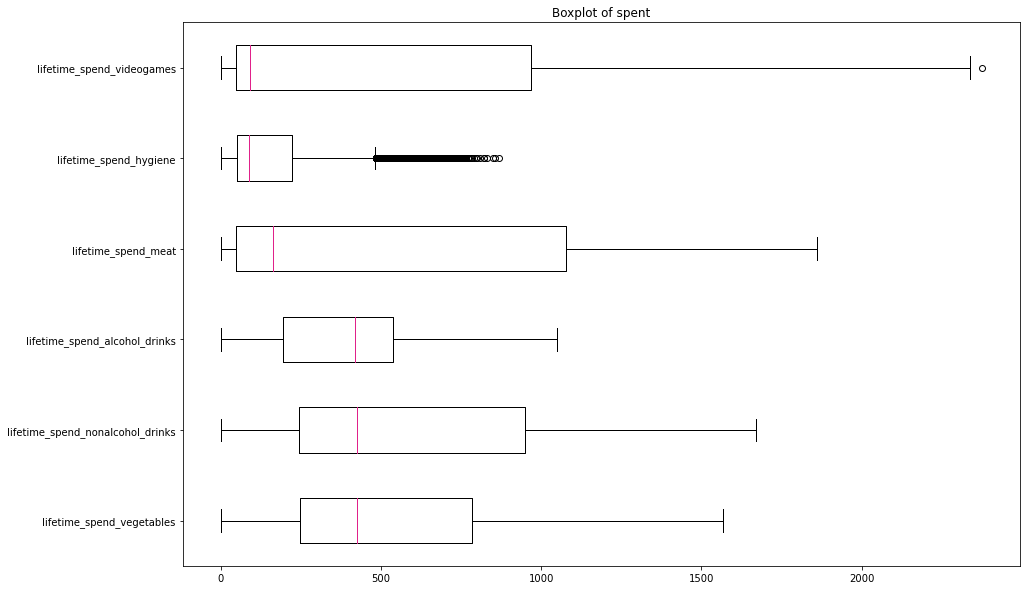

In [43]:
boxplot(spend_groups, 
        ['lifetime_spend_vegetables',
        'lifetime_spend_nonalcohol_drinks','lifetime_spend_alcohol_drinks','lifetime_spend_meat',
        'lifetime_spend_hygiene','lifetime_spend_videogames'],
       'spent')

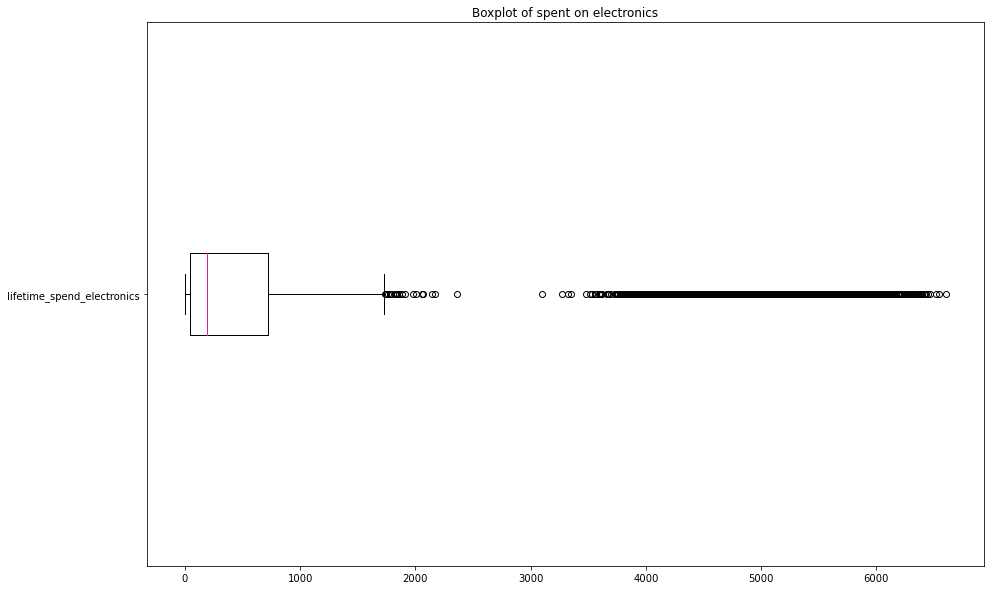

In [44]:
boxplot(elec_group,
       ['lifetime_spend_electronics'],
       'spent on electronics')

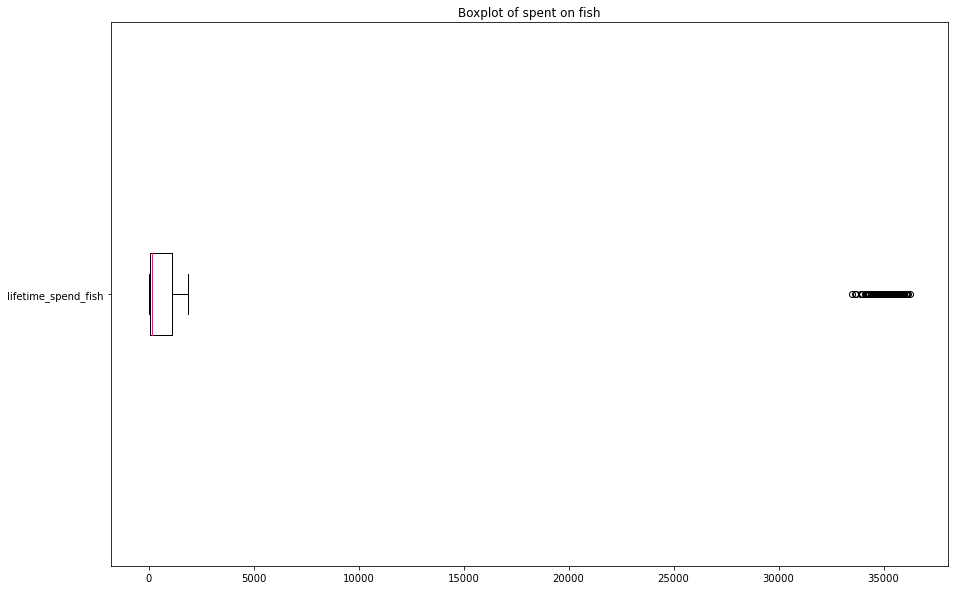

In [45]:
boxplot(fish_group,
       ['lifetime_spend_fish'],
       'spent on fish')

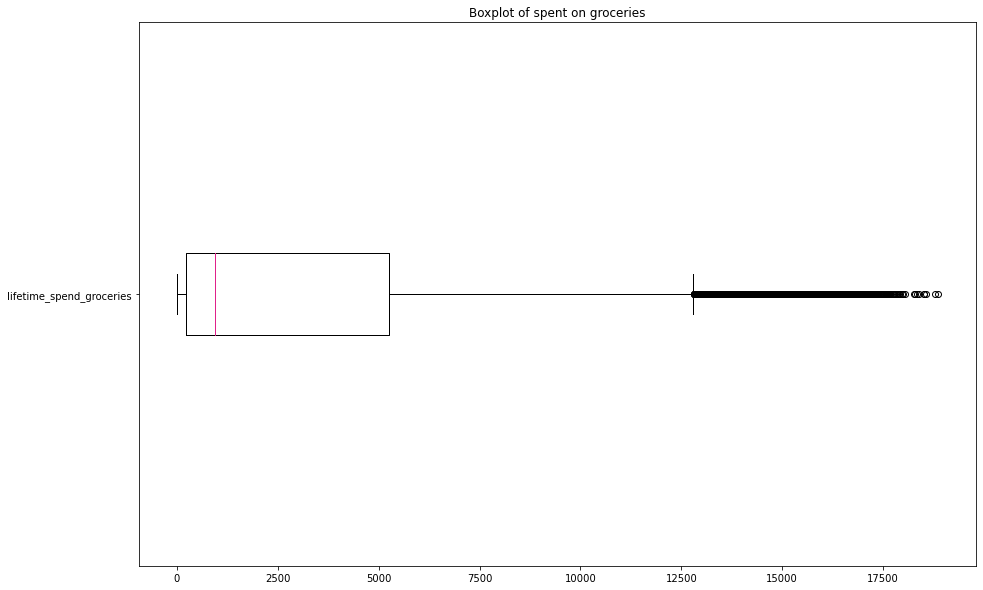

In [46]:
boxplot(groc_group,
       ['lifetime_spend_groceries'],
       'spent on groceries')

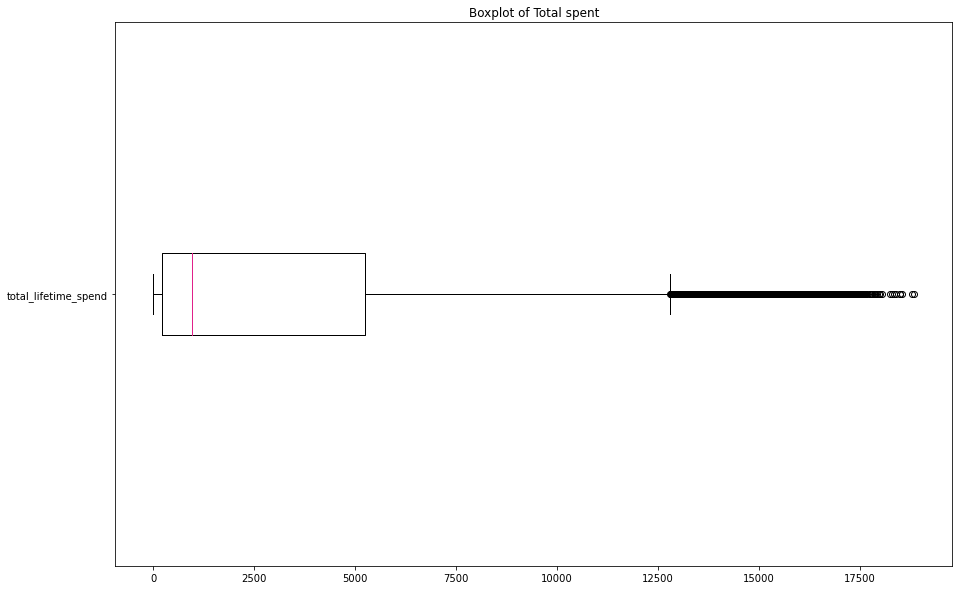

In [47]:
boxplot(groc_group,
       ['total_lifetime_spend'],
       'Total spent')

##### See the location of the customers.

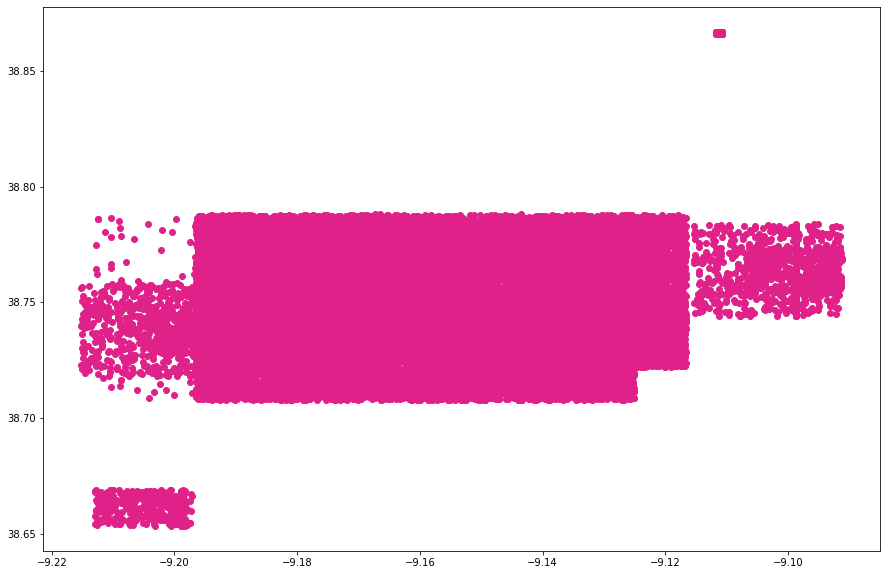

In [48]:
plt.scatter(
    cust_info.longitude,
    cust_info.latitude,
    color = '#e0218a'
    )

In [49]:
# Create a scatter mapbox figure 
fig = px.scatter_mapbox(cust_info, lat='latitude', lon='longitude', title ='Big Brother is watching you')

# Set the mapbox style and center on Lisbon
fig.update_layout(mapbox_style='open-street-map', mapbox_center={'lat': 38.736946, 'lon': -9.142685}, mapbox_zoom=9)

# Modify the marker color
fig.update_traces(marker=dict(color='#e0218a'))

# Show the figure
fig.show()

##### See the relation of the different categories

In [50]:
spend = num_cust_info[['lifetime_spend_groceries','lifetime_spend_electronics','lifetime_spend_vegetables',
                        'lifetime_spend_nonalcohol_drinks','lifetime_spend_alcohol_drinks','lifetime_spend_meat',
                        'lifetime_spend_fish','lifetime_spend_hygiene','lifetime_spend_videogames','total_lifetime_spend']]

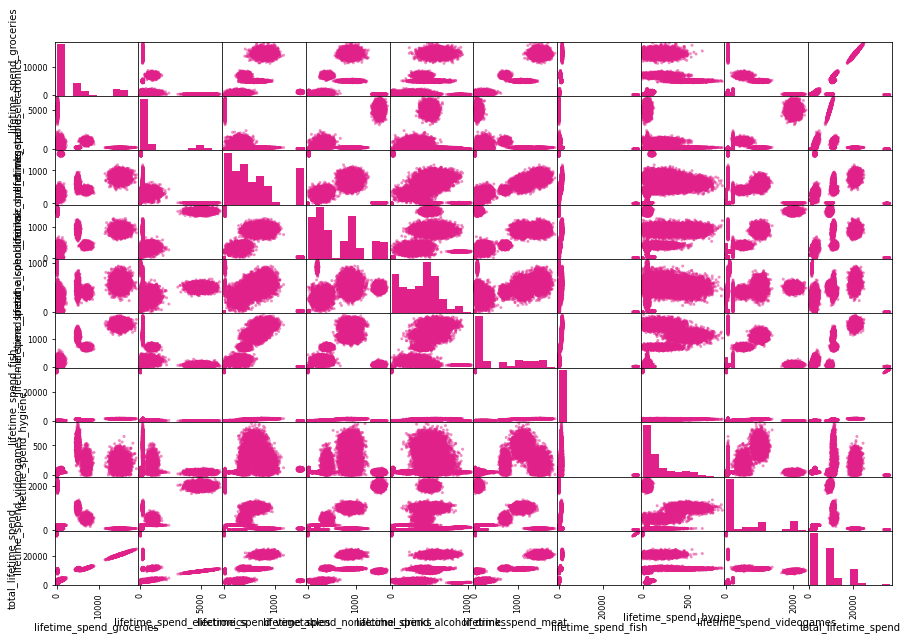

In [51]:
scatter_matrix(spend,diagonal='hist', color = '#e0218a',hist_kwds = {'color': '#e0218a'})
plt.show()

We can see that the fish category 

In [52]:
from bokeh.plotting import figure
from bokeh.io import output_notebook, show

# Enable Bokeh to display plots in the notebook
output_notebook()

# Create a figure
p = figure(title='relation between electronics and total', x_axis_label='total spent', y_axis_label='videogames spent')

# Add a circle renderer with a size, color, and alpha
p.scatter(cust_info.total_lifetime_spend, cust_info.lifetime_spend_videogames, marker='circle', size=10, color="#e0218a", alpha=0.5)

# Show the plot in the notebook
show(p)


Loading BokehJS ...

In [53]:
years = cust_info['year_first_transaction'].value_counts()

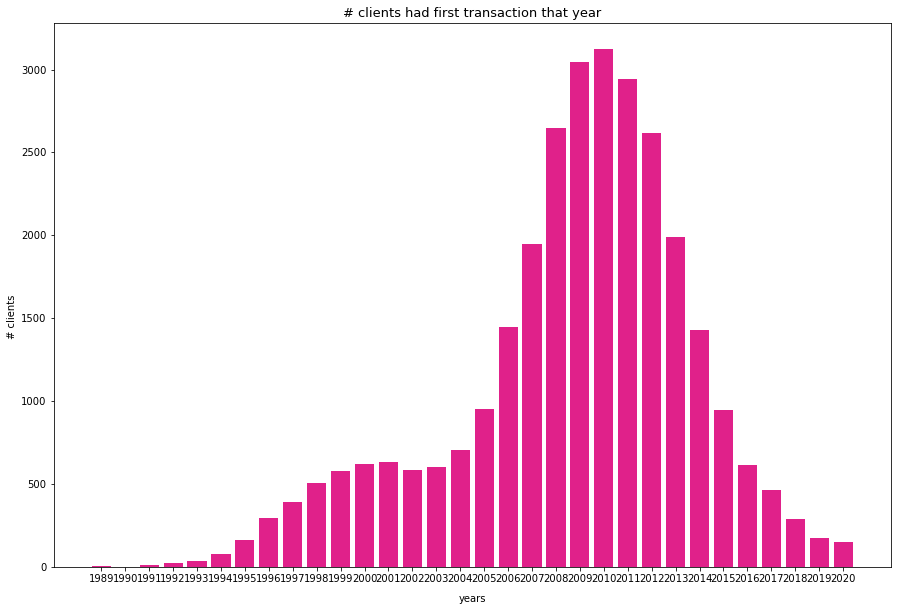

In [54]:
bar_chart(years.index, years.values,
         x_name = 'years', y_name = '# clients',
         title = '# clients had first transaction that year')

In [55]:
dependents = cust_info['number_dependents'].value_counts()

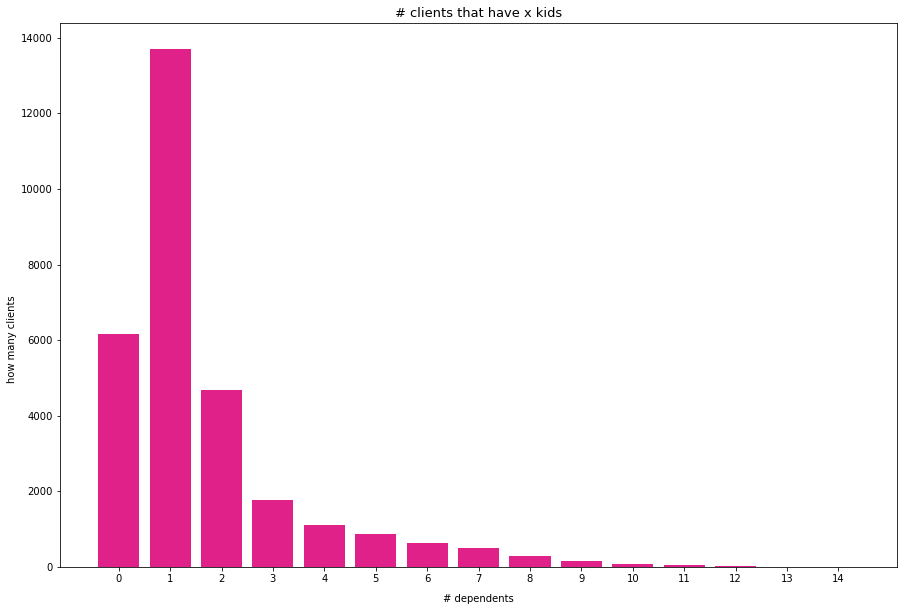

In [56]:
bar_chart(dependents.index, dependents.values,
         x_name = '# dependents', y_name = 'how many clients',
         title = '# clients that have x kids')

In [57]:
cust_info

customer_name  customer_birthdate  kids_home  teens_home  \
customer_id                                                                     
4239                Sara Moscowitz 1999-09-10 15:11:00          0           0   
19330             Donald Robertson 1981-06-26 22:58:00          1           0   
2272         Phd. Felicia Bradshaw 1987-01-31 09:08:00          1           1   
25288                Emma Williams 1942-06-17 00:02:00          3           4   
12829                 Hilda Huerta 1999-01-01 00:00:00          0           0   
...                            ...                 ...        ...         ...   
625               Phd. Karen Watts 1974-11-01 05:26:00          0           0   
26447              Curtis Thompson 1986-02-21 11:27:00          0           0   
182                 Richard Carter 2000-01-01 00:00:00          0           0   
13768                  Jerry Yoder 1958-08-21 12:12:00          1           0   
2570             Phd. James Cooper 1944-01-16 09:35:00          1           1   

             number_complaints  distinct_stores_visited  \
customer_id                                               
4239                         0                        2   
19330                        0                        2   
2272                         0                       20   
25288                        1                        2   
12829                        0                        2   
...                        ...                      ...   
625                          1                        2   
26447                        0                        3   
182                          0                        2   
13768                        1                       20   
2570                         0                        2   

             lifetime_spend_groceries  lifetime_spend_electronics  \
customer_id                                                         
4239                             91.0                        20.0   
19330                           197.0                      5958.0   
2272                            397.0                        20.0   
25288                          5282.0                       237.0   
12829                            82.0                        22.0   
...                               ...                         ...   
625                             209.0                      5474.0   
26447                           185.0                      1066.0   
182                              83.0                        23.0   
13768                           391.0                        20.0   
2570                            834.0                       596.0   

             typical_hour  lifetime_spend_vegetables  ...  \
customer_id                                           ...   
4239                   22                       22.0  ...   
19330                  21                       20.0  ...   
2272                    9                      310.0  ...   
25288                  12                      499.0  ...   
12829                  21                        9.0  ...   
...                   ...                        ...  ...   
625                    20                       18.0  ...   
26447                  15                      267.0  ...   
182                    23                       23.0  ...   
13768                  10                      295.0  ...   
2570                   18                      339.0  ...   

             percentage_of_products_bought_promotion  year_first_transaction  \
customer_id                                                                    
4239                                        0.192154                    2017   
19330                                       0.098647                    2015   
2272                                        0.497251                    2008   
25288                                       0.206713                    2010   
12829                      

In [58]:
hours = cust_info['typical_hour'].value_counts()

<BarContainer object of 24 artists>

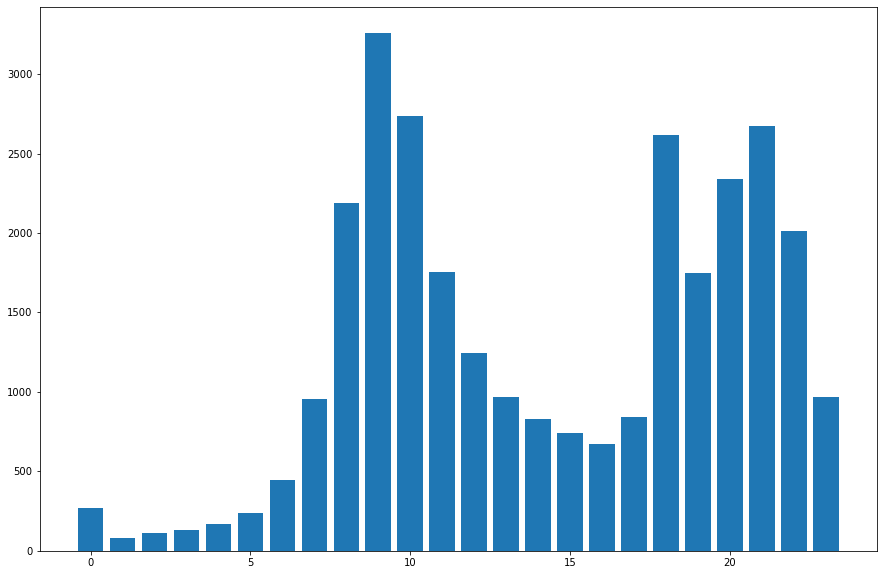

In [59]:
plt.bar(hours.index, hours.values)

In [60]:
cust_info.percentage_of_products_bought_promotion

customer_id
4239     0.192154
19330    0.098647
2272     0.497251
25288    0.206713
12829    0.200625
           ...   
625      0.096366
26447    0.118998
182      0.199432
13768    0.494527
2570     0.092385
Name: percentage_of_products_bought_promotion, Length: 29998, dtype: float64

(array([6.566e+03, 4.321e+03, 5.109e+03, 2.838e+03, 3.661e+03, 2.387e+03,
        3.900e+02, 4.000e+00, 0.000e+00, 4.722e+03]),
 array([1.0000e+00, 1.5770e+02, 3.1440e+02, 4.7110e+02, 6.2780e+02,
        7.8450e+02, 9.4120e+02, 1.0979e+03, 1.2546e+03, 1.4113e+03,
        1.5680e+03]),
 <BarContainer object of 10 artists>)

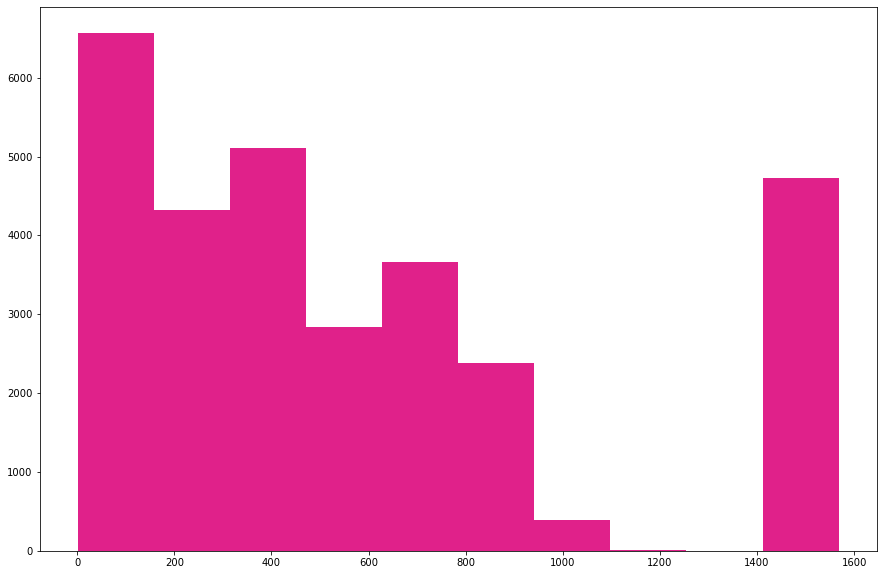

In [61]:
plt.hist(cust_info.lifetime_spend_vegetables, color = '#e0218a')

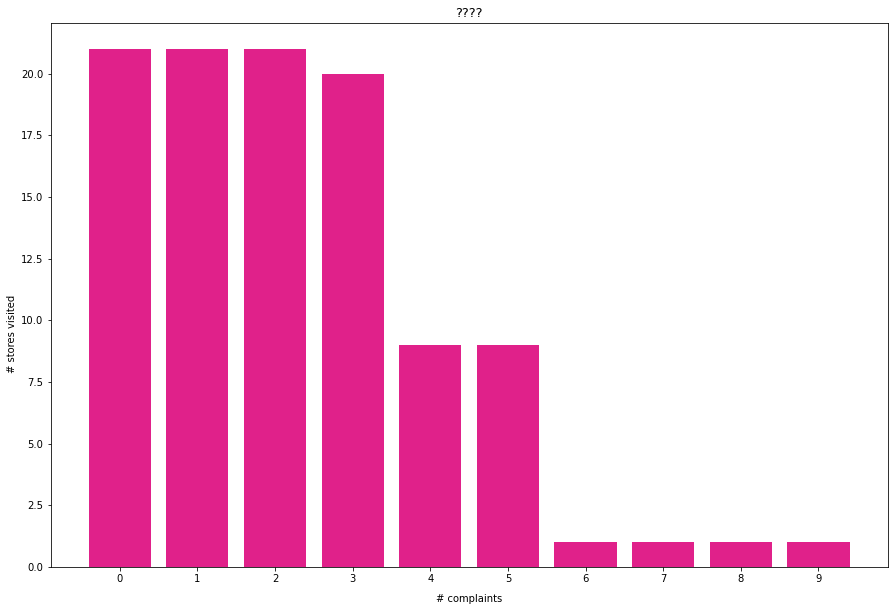

In [62]:
bar_chart(cust_info.number_complaints,cust_info.distinct_stores_visited,
         '# complaints', '# stores visited', '????')

In [63]:
cust_info.lifetime_total_distinct_products.value_counts()

201.0     214
200.0     205
199.0     195
203.0     185
206.0     183
         ... 
3907.0      1
3600.0      1
3089.0      1
4390.0      1
1749.0      1
Name: lifetime_total_distinct_products, Length: 3173, dtype: int64

(array([19096.,  1471.,    26.,  4639.,    60.,   650.,  1926.,  1649.,
          444.,    37.]),
 array([   0. ,  581.8, 1163.6, 1745.4, 2327.2, 2909. , 3490.8, 4072.6,
        4654.4, 5236.2, 5818. ]),
 <BarContainer object of 10 artists>)

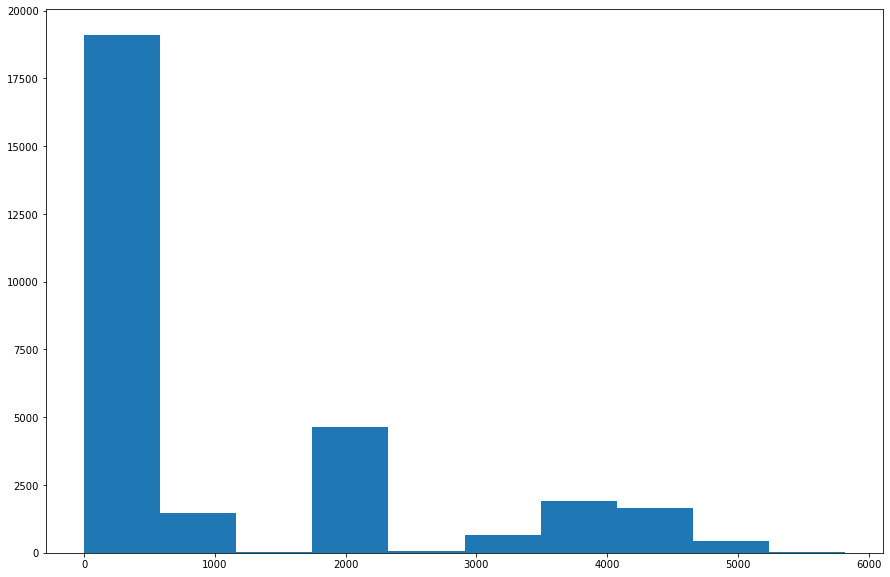

In [64]:
plt.hist(cust_info.lifetime_total_distinct_products)
# Nao podes fazer tal coisa porque o loyalty card tem infinitos
# Se quiseres é o cust_per_card

### Categorical Data

## 11. Correlation

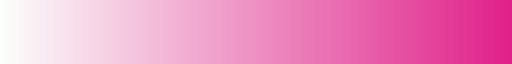

In [65]:
sequential_colors = sns.color_palette("RdPu", 10)
# melhor ate agora
sns.color_palette("blend:#fcfffc,#e0218a", as_cmap=True)

<AxesSubplot:>

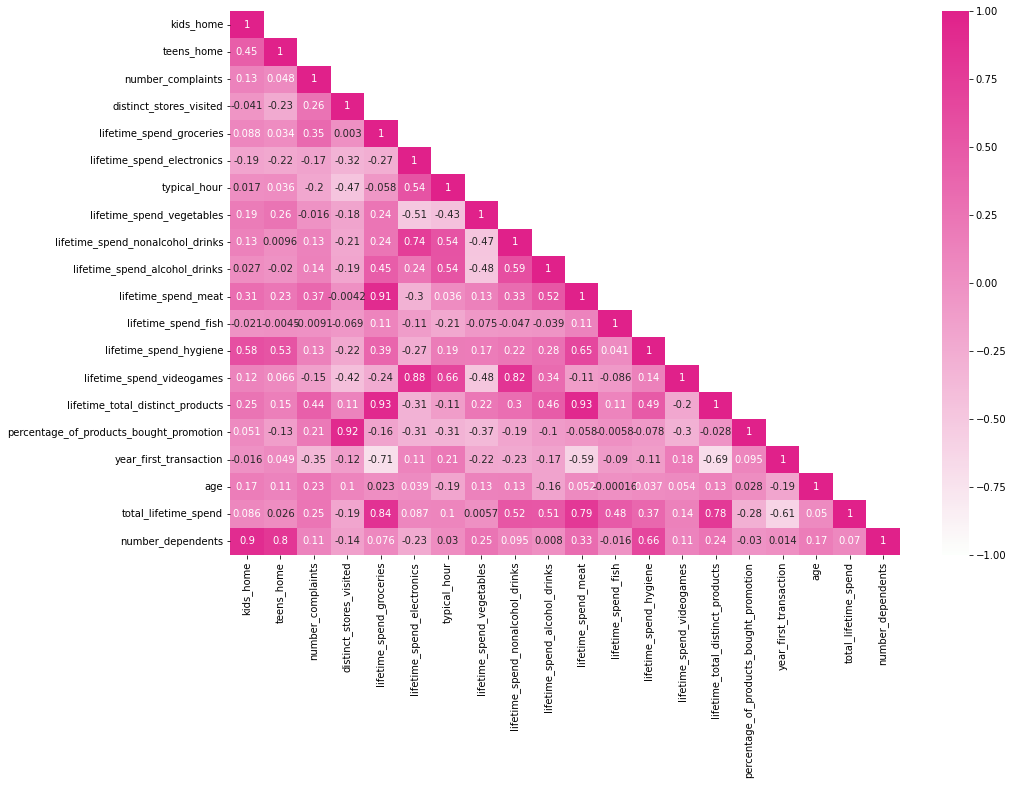

In [66]:
corr = num_cust_info.drop(['female'], axis=1).corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, cmap=sns.color_palette("blend:#fcfffc,#e0218a", as_cmap=True), annot=True, mask=np.triu(corr,k=1),vmax = 1, vmin = -1)

## 12. Explore

In [67]:
last_names = cust_info['customer_name'].str.split().str[-1]

# Group the data by last name and calculate the statistics for each variable
grouped_data = cust_info.groupby(last_names)[num_cust_info.columns]

# Filter the groups based on count restriction
filtered_data = grouped_data.filter(lambda x: len(x) > 100)

# Calculate the statistics for each variable within each filtered group
statistics = filtered_data.groupby(last_names)[num_cust_info.columns].agg(['mean', 'max'])

statistics

kids_home     teens_home     number_complaints      \
                   mean max       mean max              mean max   
customer_name                                                      
Anderson       0.859813   5   0.448598   3          0.766355   4   
Brown           1.08427   8        0.5   4          0.724719   4   
Davis          1.335366   7   0.646341   7          0.969512   8   
Harris         1.137255   6   0.460784   5          0.823529   6   
Johnson        1.206406   7   0.476868   6           0.72242   3   
Jones          1.201005   7   0.542714   5           0.81407   4   
Miller         1.014493   6   0.326087   4          0.833333   6   
Smith          1.214511   8   0.567823   6          0.731861   3   
Supermarket         0.0   0        0.0   0               0.0   0   
Taylor         1.431193   9   0.522936   4          0.825688   4   
Williams       1.133603   7   0.518219   4          0.850202   6   
Wilson         1.025641   5   0.521368   4          0.692308   6   

              distinct_stores_visited     lifetime_spend_groceries  \
                                 mean max                     mean   
customer_name                                                        
Anderson                     4.841121  20              3388.700935   
Brown                        6.196629  20              4242.808989   
Davis                        6.115854  21              5004.939024   
Harris                       6.392157  21              4525.058824   
Johnson                      6.096085  20              4398.000000   
Jones                        5.829146  20              3704.507538   
Miller                       6.550725  20              4913.688406   
Smith                        6.611987  20              4441.034700   
Supermarket                       1.0   1                 2.701888   
Taylor                       6.229358  20              4203.302752   
Williams                     6.469636  21              3734.093117   
Wilson                       5.547009  20              3261.188034   

                             ... year_first_transaction              age      \
                        max  ...                   mean   max       mean max   
customer_name                ...                                               
Anderson       15456.000000  ...            2009.018692  2018  52.046729  81   
Brown          17208.000000  ...            2008.556180  2020  54.882022  83   
Davis          17353.000000  ...            2008.201220  2020  52.536585  82   
Harris         16824.000000  ...            2008.754902  2019  53.666667  83   
Johnson        16944.000000  ...            2008.498221  2020  52.245552  83   
Jones          17493.000000  ...            2009.015075  2019  53.035176  83   
Miller         17582.000000  ...            2008.202899  2020  51.717391  83   
Smith          17212.000000  ...            2008.463722  2020  53.119874  82   
Supermarket        2.844843  ...            2010.022321  2017  50.598214  83   
Taylor         16887.000000  ...            2008.302752  2020  52.449541  81   
Williams       17748.000000  ...            2008.959514  2020  54.599190  83   
Wilson         17744.000000  ...            2009.350427  2018  50.222222  83   

                 female     total_lifetime_spend                \
                   mean max                 mean           max   
customer_name                                                    
Anderson       0.476636   1          7987.971963  21090.000000   
Brown          0.483146   1          8593.882022  23144.000000   
Davis          0.475610   1          9491.012195  23338.000000   
Harris         0.549020   1          8959.343137  22714.000000   
Johnson        0.476868   1          8781.131673  22670.000000   
Jones          0.517588   1          8116.000000  23238.000000   
Miller         0.521739   1          8953.891304  23487.000000   
Smith          0.485804   1          8902.003155  22958.000000   
Supermarket    

## 13.Export Datasets

In [68]:
cust_info.to_csv('cust_data.csv')